In [25]:
import cv2 
from matplotlib import pyplot as plt
photo1 = cv2.imread("/content/Ashton_kutcher.jpg") 
photo2 = cv2.imread("/content/barney-stinson-1.webp") 

In [26]:
def ldp(photo):
  import cv2 
  import numpy as np 
  def assign_bit(picture, x, y, c1,c2,d):  #assign bit according to degree and neighbouring pixel
    #a and b are 1 if increasing and 0 if decreasing
    if (d==0):
      a = 0    
      b =0  
      try:
        if picture[c1][c2+1] >= picture[c1][c2]:
          a= 1
        if picture[x][y+1] >= picture[x][y]:
          b= 1         
      except:
        pass
    if (d==45):
      a = 0    
      b =0  
      try:
        if picture[c1-1][c2+1] >= picture[c1][c2]:
          a= 1
        if picture[x-1][y+1] >= picture[x][y]:
          b= 1
      except: 
        pass
    if (d==90):
      a = 0   
      b =0  
      try:
        if picture[c1-1][c2] >= picture[c1][c2]:
          a= 1
        if picture[x-1][y] >= picture[x][y]:
          b= 1
      except:
        pass
    if (d==135):
      a = 0    
      b =0 
      try:
        if picture[c1-1][c2-1] >= picture[c1][c2]:
          a= 1
        if picture[x-1][y-1] >= picture[x][y]:
          b= 1
      except:
        pass
    if (a==b): #if monotonically increasing or decreasing than 0
      return "0"
    else:      #if turning point 
      return "1"
    return bit
  def local_der_val(picture, x, y):  #calculating local derivative pattern value of a pixel
    thirtytwo_bit_binary = []
    centre = picture[x][y] 
    c1=x
    c2=y
    decimal_val = 0
    #starting from top left,assigning bit to pixels clockwise at 0 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,0))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,0 )) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,0)) 
    
    #starting from top left,assigning bit to pixels clockwise at 45 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,45))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,45)) 
    
    #starting from top left,assigning bit to pixels clockwise at 90 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,90))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,90 )) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,90)) 

    #starting from top left,assigning bit to pixels clockwise at 135 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,135))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,135)) 

    str1 = ""   
    l=str1.join(thirtytwo_bit_binary)#32 bit binary number
    decimal_val=int(l,2)   #32 bit binary to decimal number
    return decimal_val 
  m, n, _ = photo.shape 
  gray_scale = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
  ldp_photo = np.zeros((m, n),np.uint8) 
  # converting image to ldp
  for i in range(0,m): 
      for j in range(0,n): 
          ldp_photo[i, j] = local_der_val(gray_scale, i, j) 
 
  return ldp_photo
 

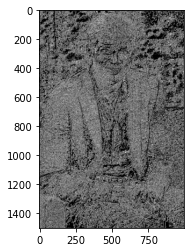

array([[ 26, 195, 128, ..., 206, 142,   6],
       [ 59, 131,   0, ..., 224, 224, 248],
       [179, 143,  14, ...,   0,   0,  56],
       ...,
       [128,  40,  76, ...,  24, 227, 192],
       [  0,  24, 227, ...,  56, 131,   0],
       [  0,  48, 143, ...,  62, 129,   0]], dtype=uint8)

In [27]:
l1=ldp(photo1)
plt.imshow(l1, cmap ="gray") 
plt.show() 
l1

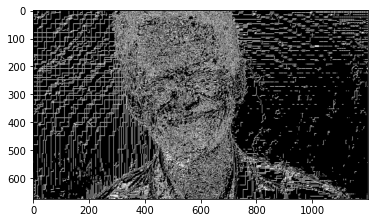

array([[ 64, 128,   0, ..., 128,   0,  56],
       [  0,   0,   0, ...,   0,   0,  56],
       [  0,   0,   0, ...,   0,   0,  56],
       ...,
       [187, 131,   0, ..., 131,   0,  56],
       [187, 131,   0, ..., 131,   0,  56],
       [177, 143,  14, ..., 143,  14,  62]], dtype=uint8)

In [24]:
l2=ldp(photo2)
plt.imshow(l2, cmap ="gray") 
plt.show() 
l2